In [5]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from branca.colormap import linear

In [6]:
#store all uoas in df

units_of_assessment = ['Clinical Medicine', 'Public Health, Health Services and Primary Care',
        'Allied Health Professions, Dentistry, Nursing and Pharmacy',
        'Psychology, Psychiatry and Neuroscience', 'Biological Sciences',
        'Agriculture, Veterinary and Food Science',
        'Earth Systems and Environmental Sciences', 'Chemistry', 'Physics',
        'Mathematical Sciences', 'Computer Science and Informatics',
        'Aeronautical, Mechanical, Chemical and Manufacturing Engineering',
        'Electrical and Electronic Engineering, Metallurgy and Materials',
        'Civil and Construction Engineering', 'General Engineering',
        'Architecture, Built Environment and Planning',
        'Geography, Environmental Studies and Archaeology',
        'Economics and Econometrics', 'Business and Management Studies', 'Law',
        'Politics and International Studies', 'Social Work and Social Policy',
        'Sociology', 'Anthropology and Development Studies', 'Education',
        'Sport and Exercise Sciences, Leisure and Tourism', 'Area Studies',
        'Modern Languages and Linguistics', 'English Language and Literature',
        'History', 'Classics', 'Philosophy', 'Theology and Religious Studies',
        'Art and Design: History, Practice and Theory',
        'Music, Drama, Dance and Performing Arts',
        'Communication, Cultural and Media Studies, Library and Information Management']


df = pd.DataFrame({'UOA':units_of_assessment})

In [7]:
#uncomment data fields to be extracted from REF api

fields = ['CaseStudyId',
         #'Continent',
         #'Country',
         #'Funders'
         'ImpactDetails',
         'ImpactSummary', 
         'ImpactType',
         #'Institutions',
         #'Panel',
         #'PlaceName',
         #'References',
         #'ResearchSubjectAreas',
         #'Sources',
         #'Title',
         #'UKLocation',
         #'UKRegion',
         #'UnderpinningResearch',
         'UOA'
        ]

In [8]:
#list containing uoa indexes to be extracted
extract_uoas = [1,2]

#pull api data and store in query_df
field_list = []
for i in fields:
    globals()[i] = []
    field_list.append(globals()[i])
    
for uoa in tqdm(extract_uoas):
    url = requests.get('https://impact.ref.ac.uk/casestudiesapi/REFAPI.svc/SearchCaseStudies?UoA='+str(uoa)+'&format=JSON')
    data = url.json()
            
    for i in range(len(data)):
        for field in fields:
            globals()[field].append(data[i][field])

query_data = {}
for i in fields: 
    query_data[i] = globals()[i]
    
query_df = pd.DataFrame.from_dict(query_data)

100%|██████████| 2/2 [00:14<00:00,  8.27s/it]


In [9]:
#extract api data by keyword
extract_keyword = 'HIV'

#pull api data and store in query_df
url = requests.get('https://impact.ref.ac.uk/casestudiesapi/REFAPI.svc/SearchCaseStudies?phrase='+'\"'+extract_keyword+'\"'+'&format=JSON')
data = url.json()

field_list = []
for i in fields:
    globals()[i] = []
    field_list.append(globals()[i])
    
for i in range(len(data)):
        for field in fields:
            globals()[field].append(data[i][field])
            
query_data = {}
for i in fields: 
    query_data[i] = globals()[i]
    
query_df = pd.DataFrame.from_dict(query_data)

In [10]:
def impactPlot():
    '''plot keyword case studies by impact type'''
    
    query_df['count'] = 1
    count_df = query_df.groupby('ImpactType').count()['count'].reset_index()
    count_df['percentage'] = count_df['count'].apply(lambda x:x/sum(count_df['count'])*100)

    x_pos = np.arange(len(count_df['ImpactType']))
    y_axis = count_df['percentage']
    
    color = ['orange']*1 + ['purple']*1 + ['darkturquoise']*1+ ['red']*1 +['blue']*1 + ['green']*1+['pink']*1 +['yellow']*1
    plt.figure(figsize=(10,10))
    plt.bar(x_pos, y_axis, color=color, align='center')
    plt.xticks(x_pos, count_df['ImpactType'] ,rotation='vertical')
    plt.ylabel('% of Case Studies')
    plt.title('Impact type breakdown: '+extract_keyword.upper()+' ('+str(sum(count_df['count']))+' case studies)',fontsize=20)

In [11]:
def uoaPlot():
    '''plot keyword case studies by unit of assessment'''
    
    query_df['count'] = 1
    count_df = query_df.groupby('UOA').count()['count'].reset_index()
    count_df['percentage'] = count_df['count'].apply(lambda x:x/sum(count_df['count'])*100)
    
    count_dict = dict(zip(count_df['UOA'],count_df['percentage']))
    df['percentage'] = df['UOA'].apply(lambda x:count_dict.get(x))

    color = ['orange']*9 + ['purple']*8 + ['darkturquoise']*10+ ['red']*9
    panel_one = mpatches.Patch(color='orange', label='Medicine & Natural Sciences')
    panel_two = mpatches.Patch(color='purple', label='Maths & Engineering')
    panel_three = mpatches.Patch(color='darkturquoise', label='Social Sciences')
    panel_four = mpatches.Patch(color='red', label='Humanities')
    
    x_pos = np.arange(len(df['UOA']))
    y_axis = df['percentage']

    plt.figure(figsize=(10,10))
    plt.bar(x_pos, y_axis, color=color, align='center')
    plt.xticks(x_pos, df['UOA'] ,rotation='vertical')
    plt.ylabel('% of Case Studies')
    plt.title('REF2014 coverage of \"'+extract_keyword.upper()+'\"',fontsize=20)
    plt.axis([-1, 36, 0,round(df['percentage'].max(),-1)])
    plt.legend(handles=[panel_one, panel_two, panel_three,panel_four])

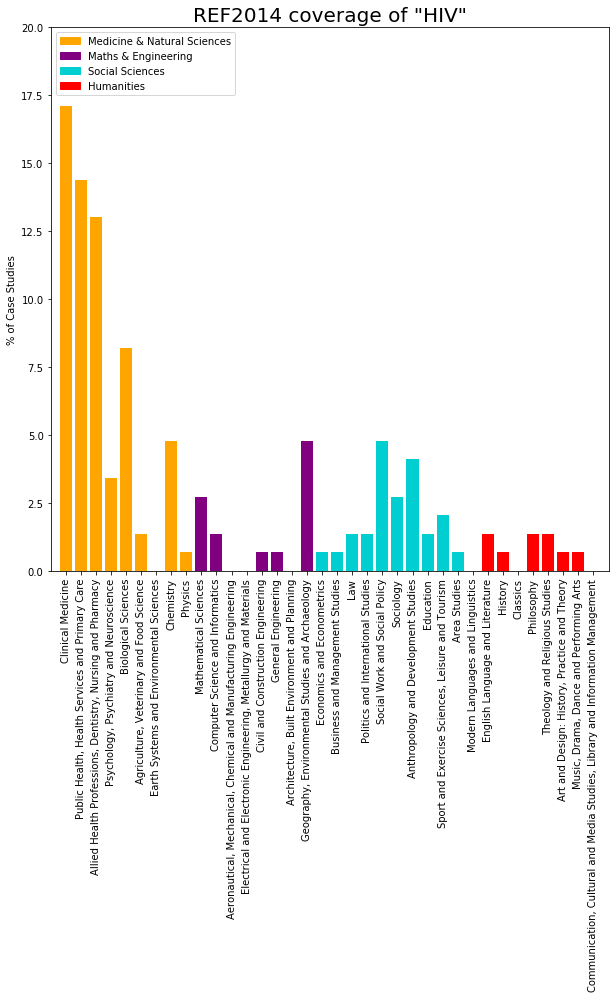

In [15]:
uoaPlot()

Not surprising that HIV scores highest in health science units of assessment.<br/>
But also actvitiy in social sciences.

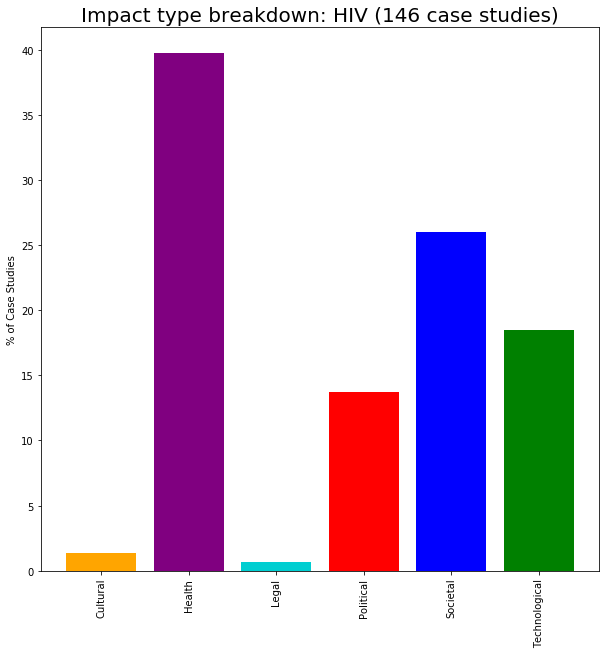

In [16]:
impactPlot()

Interesting to see that along with health, a non-trivial proportion of case studies ascribe political, societal, technological impact to their research.<br/>
Supports an interpretation of HIV research impact as multi-faceted.